# PME3481 - Controle e Aplicações

## Resposta em Frequência

Dadas as funções de transferência obtidas, o objetivo é estudar a resposta em frequência do sistema e obter os diagramas de bode.

### Configuração do Ambiente e Bibliotecas

Introdução das bibliotecas mais importantes.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import control

import warnings
warnings.filterwarnings('ignore')

### Funções de Transferência

In [2]:
G_1 = control.tf([ 0.00000000e+00,  2.60208521e-18,  0.00000000e+00,  1.69406589e-21,
   0.00000000e+00,  0.00000000e+00,  0.00000000e+00],[ 1.00000000e+00, -2.53575404e-03, -5.17014925e-03,  1.31102268e-05,
  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

G_2 = control.tf( [ 0.00000000e+00,  4.24718624e-02,  0.00000000e+00, -2.19585867e-04,
   0.00000000e+00,  0.00000000e+00,  0.00000000e+00],[ 1.00000000e+00, -2.53575404e-03, -5.17014925e-03,  1.31102268e-05,
  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

G_3 = control.tf([ 0.00000000e+00,  2.60208521e-18,  0.00000000e+00,  1.69406589e-21,
   0.00000000e+00,  0.00000000e+00,  0.00000000e+00], [ 1.00000000e+00, -2.53575404e-03, -5.17014925e-03,  1.31102268e-05,
  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

print(G_1)
print(G_2)
print(G_3)


         2.602e-18 s^5 + 1.694e-21 s^3
------------------------------------------------
s^6 - 0.002536 s^5 - 0.00517 s^4 + 1.311e-05 s^3


          0.04247 s^5 - 0.0002196 s^3
------------------------------------------------
s^6 - 0.002536 s^5 - 0.00517 s^4 + 1.311e-05 s^3


         2.602e-18 s^5 + 1.694e-21 s^3
------------------------------------------------
s^6 - 0.002536 s^5 - 0.00517 s^4 + 1.311e-05 s^3



(num,den) = control.pade(0.25,3)
Gp = control.tf(num,den)*G
print(Gp)

### Diagrama de Bode

In [3]:
(num,den) = control.pade(0.25,3)
Gp_1 = control.tf(num,den)*G_1

(num,den) = control.pade(0.25,3)
Gp_2 = control.tf(num,den)*G_2

(num,den) = control.pade(0.25,3)
Gp_3= control.tf(num,den)*G_3

print(Gp_1)
print(Gp_2)
print(Gp_3)


-2.602e-18 s^8 + 1.249e-16 s^7 - 2.498e-15 s^6 + 1.998e-14 s^5 - 1.626e-18 s^4 + 1.301e-17 s^3
----------------------------------------------------------------------------------------------
           s^9 + 48 s^8 + 959.9 s^7 + 7677 s^6 - 24.44 s^5 - 39.69 s^4 + 0.1007 s^3


-0.04247 s^8 + 2.039 s^7 - 40.77 s^6 + 326.2 s^5 + 0.2108 s^4 - 1.686 s^3
-------------------------------------------------------------------------
s^9 + 48 s^8 + 959.9 s^7 + 7677 s^6 - 24.44 s^5 - 39.69 s^4 + 0.1007 s^3


-2.602e-18 s^8 + 1.249e-16 s^7 - 2.498e-15 s^6 + 1.998e-14 s^5 - 1.626e-18 s^4 + 1.301e-17 s^3
----------------------------------------------------------------------------------------------
           s^9 + 48 s^8 + 959.9 s^7 + 7677 s^6 - 24.44 s^5 - 39.69 s^4 + 0.1007 s^3



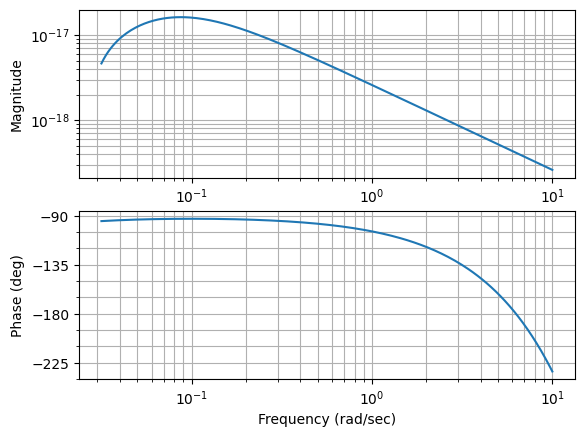

In [4]:
w = np.logspace(-1.5,1,200)
mag,phase,omega = control.bode(Gp_1,w)

Análise de Ganho de Fase e Frequência de Corte

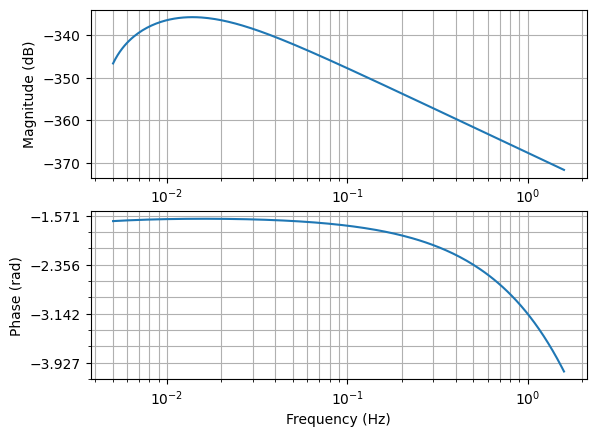

In [5]:
mag,phase,omega = control.bode(Gp_1,w,Hz=True,dB=True,deg=False)

Crossover freq =  10000.0  rad/sec
Gain at crossover =  2.602085209848444e-22


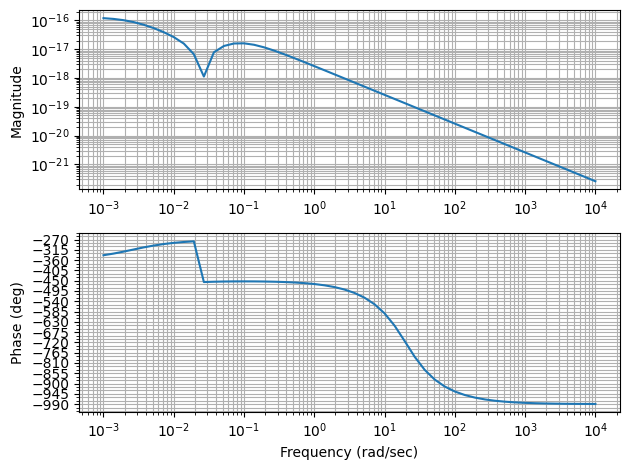

In [6]:
w = np.logspace(-3,4)
mag,phase,omega = control.bode(Gp_1,w);
plt.tight_layout()

# find the cross-over frequency and gain at cross-over
wc = np.interp(-180.0,np.flipud(phase),np.flipud(omega))
Kcu = np.interp(wc,omega,mag)

print('Crossover freq = ', wc, ' rad/sec')
print('Gain at crossover = ', Kcu)

Crossover freq =  10000.0  rad/sec
Gain at crossover =  4.2471862399998634e-06


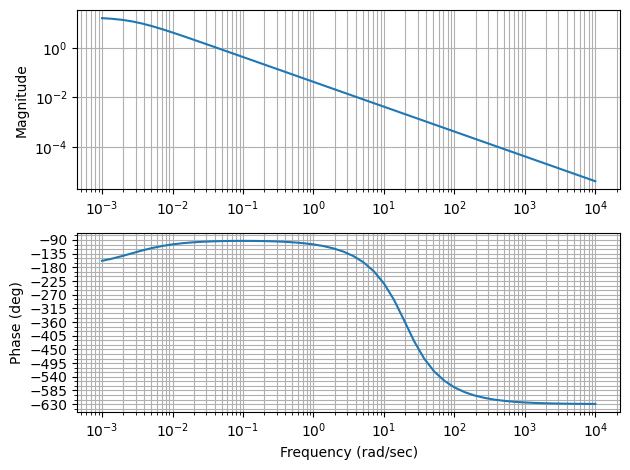

In [7]:
w = np.logspace(-3,4)
mag,phase,omega = control.bode(Gp_2,w);
plt.tight_layout()

# find the cross-over frequency and gain at cross-over
wc = np.interp(-180.0,np.flipud(phase),np.flipud(omega))
Kcu = np.interp(wc,omega,mag)

print('Crossover freq = ', wc, ' rad/sec')
print('Gain at crossover = ', Kcu)

Crossover freq =  10000.0  rad/sec
Gain at crossover =  2.602085209848444e-22


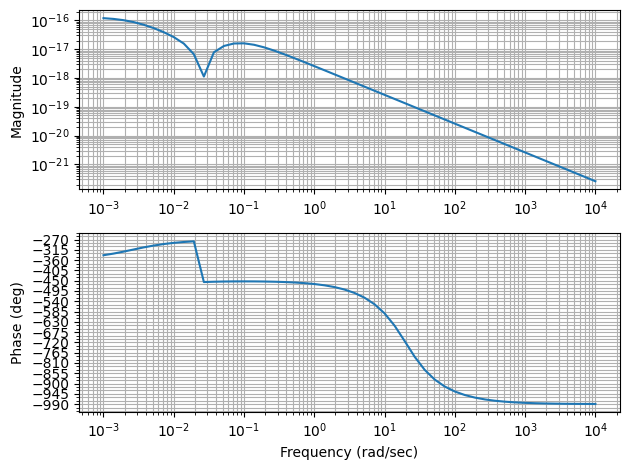

In [8]:
w = np.logspace(-3,4)
mag,phase,omega = control.bode(Gp_3,w);
plt.tight_layout()

# find the cross-over frequency and gain at cross-over
wc = np.interp(-180.0,np.flipud(phase),np.flipud(omega))
Kcu = np.interp(wc,omega,mag)

print('Crossover freq = ', wc, ' rad/sec')
print('Gain at crossover = ', Kcu)